# Introduction

In [3]:
setwd(Sys.getenv("HOME"))

In [4]:
source("R_func/seurat_load.R")

Attaching SeuratObject

Attaching sp

qs v0.25.4.



In [5]:
source("R_func/future_load.R")
source("R_func/mutate_load.R")

In [6]:
library(CellChat)
options(stringsAsFactors = FALSE)

Loading required package: igraph


Attaching package: ‘igraph’


The following object is masked from ‘package:fs’:

    path


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:future’:

    %->%, %<-%


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [7]:
library(ggplot2)
library(patchwork)

In [8]:
source("project/multiomics/CellChat/script/extract_data/my.netVisual_heatmap.R")

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




# Load other data

In [22]:
# full_meta <- fread(
#     "project/multiomics/Data/meta_data/meta.data.csv"
# )

In [23]:
# full_meta %<>% mutate(
#     batch_name = paste(Sample, Region, sep=":")
# )

# Load

In [35]:
base_dir <- "project/multiomics/CellChat/new2_resource"

In [36]:
annot_label <- "subclass_label"

In [37]:
regL <- c("DFC", "M1C", "MFC", "V1C")
names(regL) <- regL

In [38]:
chat.list <- lapply(
    regL, function(x) {
        qread(path_join(c(
            base_dir, annot_label, x, "chat.qs"
        )), nthreads=4)
    }
)

In [39]:
# chat.list <- lapply(
#     regL, function(x) {
#         qread(path_join(c(
#             base_dir, annot_label, "Consensus", x, "chat.qs"
#         )), nthreads=4)
#     }
# )

# Merge

## lift

In [40]:
subclass_color_df <- read.csv(
    "project/multiomics/PlotFig/color_dict/subclass_colors.csv"
)

In [41]:
all_celltype <- subclass_color_df$'group' %>% unique %>% sort

In [42]:
chat.list %<>% lapply(liftCellChat, all_celltype)

The CellChat object will be lifted up using the cell labels Astro, Endothelial, L2-3 IT, L4 IT, L5 ET, L5 IT, L5-6 NP, L6 CT, L6 IT, L6 IT Car3, L6b, LAMP5, Microglia, Oligo, OPC, PAX6, PVALB, PVM, SST, T-cell, VIP, VLMC



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels Astro, Endothelial, L2-3 IT, L4 IT, L5 ET, L5 IT, L5-6 NP, L6 CT, L6 IT, L6 IT Car3, L6b, LAMP5, Microglia, Oligo, OPC, PAX6, PVALB, PVM, SST, T-cell, VIP, VLMC



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels Astro, Endothelial, L2-3 IT, L4 IT, L5 ET, L5 IT, L5-6 NP, L6 CT, L6 IT, L6 IT Car3, L6b, LAMP5, Microglia, Oligo, OPC, PAX6, PVALB, PVM, SST, T-cell, VIP, VLMC



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels Astro, Endothelial, L2-3 IT, L4 IT, L5 ET, L5 IT, L5-6 NP, L6 CT, L6 IT, L6 IT Car3, L6b, LAMP5, Microglia, Oligo, OPC, PAX6, PVALB, PVM, SST, T-cell, VIP, VLMC



Update slots object@net, object@netP, object@idents in a single dataset... 


## merge

In [43]:
# object.list <- chat.list[c("V1C", "DFC")]
object.list <- chat.list

In [44]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [45]:
foo <- gc()

# export

In [80]:
cellchat.ss <- chat.list[['DFC']]

In [81]:
names(cellchat.ss@net)

[1] "prob"       "pval"       "count"      "weight"     "centr"     
[6] "similarity"

In [76]:
# head(cellchat@net$count)

In [82]:
str(cellchat.ss@net$'centr')

List of 2486
 $ LGALS9_PTPRC                :List of 11
  ..$ outdeg_unweighted: Named num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ indeg_unweighted : Named num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ outdeg           : Named num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ indeg            : Named num [1:21] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ hub              : Named num [1:21] 3.11e-17 3.11e-17 3.11e-17 3.11e-17 3.11e-17 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ authority        : Named num [1:21] 3.11e-17 3.11e-17 3.11e-17 3.11e-17 3.11e-17 ...
  .. ..- attr(*, "names")= chr [1:21] "Astro" "Endothelial" "L2-3 IT" "L4 IT" ...
  ..$ 

In [83]:
str(cellchat.ss@net$'similarity')

List of 1
 $ functional:List of 3
  ..$ matrix:List of 1
  .. ..$ single: num [1:2486, 1:2486] 1 0 0 0 0 0 0 0 0.09 0 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:2486] "LGALS9_PTPRC" "LGALS9_MET" "LGALS9_CD44" "LGALS9_LRP1" ...
  .. .. .. ..$ : chr [1:2486] "LGALS9_PTPRC" "LGALS9_MET" "LGALS9_CD44" "LGALS9_LRP1" ...
  ..$ dr    :List of 1
  .. ..$ single: num [1:1975, 1:2] -2.136 -1.149 -1.23 -1.03 -0.936 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:1975] "LGALS9_PTPRC" "LGALS9_MET" "LGALS9_CD44" "LGALS9_LRP1" ...
  .. .. .. ..$ : chr [1:2] "UMAP1" "UMAP2"
  ..$ group :List of 1
  .. ..$ single: Named int [1:1975] 4 4 4 4 4 4 4 4 4 1 ...
  .. .. ..- attr(*, "names")= chr [1:1975] "LGALS9_PTPRC" "LGALS9_MET" "LGALS9_CD44" "LGALS9_LRP1" ...


# Total number

In [938]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4), measure = "weight")
gg_num <- gg1 + gg2

In [939]:
# gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
# gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
# gg_num <- gg1 + gg2

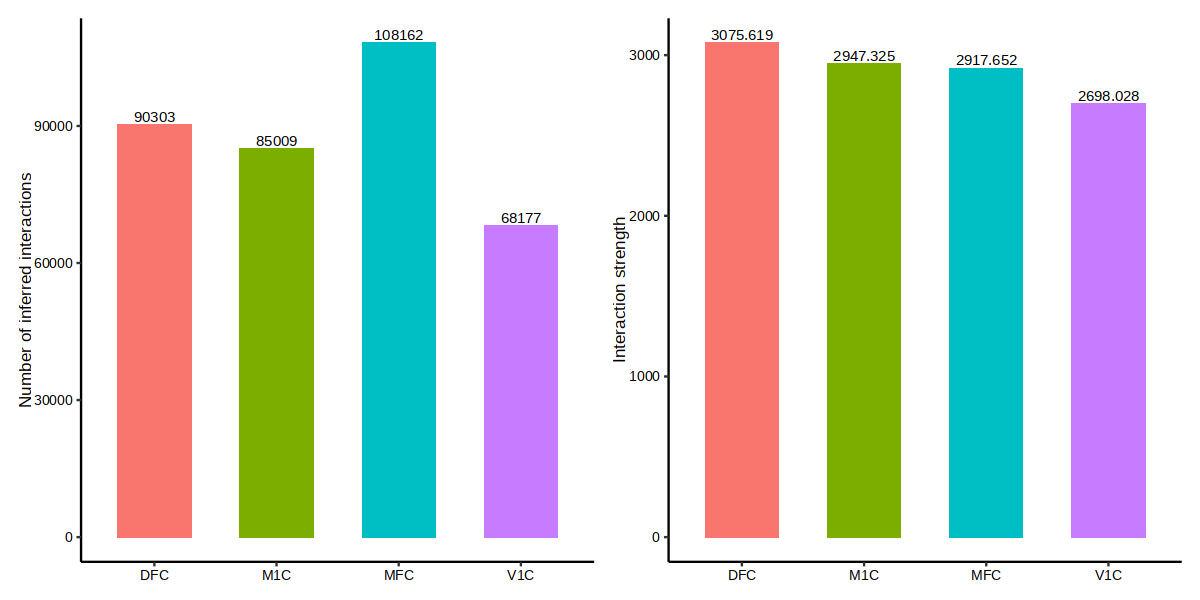

In [940]:
my.plot.size(10, 5)
gg_num

# Total between celltypes

In [46]:
sel_cell <- subclass_color_df$'group'
few_cell_groups <- c("L5 ET", "PAX6", "T-cell", "VLMC", "Endothelial")
sel_cell <- sel_cell[!sel_cell %in% few_cell_groups]

In [74]:
ss <- "net"
comparison <- c('V1C', 'DFC')
# signaling <- "EFNA5_EPHA3"

gg1 <- my.netVisual_heatmap(
    cellchat, comparison = comparison, slot.name=ss,
    measure = 'count',
    sources.use=sel_cell, targets.use=sel_cell,
    remove.isolate=T,
    cluster.rows = T, cluster.cols = T,
    font.size = 7, font.size.title = 9,
    width = w, height = h,
    title.name=glue("Differential interaction number between {comparison[1]} and {comparison[2]}")
)

gg2 <- my.netVisual_heatmap(
    cellchat, comparison = comparison,
    slot.name=ss, signaling=signaling,
    measure = 'weight',
    sources.use=sel_cell, targets.use=sel_cell,
    remove.isolate=T,
    cluster.rows = T, cluster.cols = T,
    font.size = 7, font.size.title = 9,
    width = w, height = h,
    title.name=glue("Differential interaction strength between {comparison[1]} and {comparison[2]}")
)

# gg_h <- wrap_heatmap(gg1[[1]]) + wrap_heatmap(gg2[[1]])

Do heatmap based on a merged object 


Do heatmap based on a merged object 




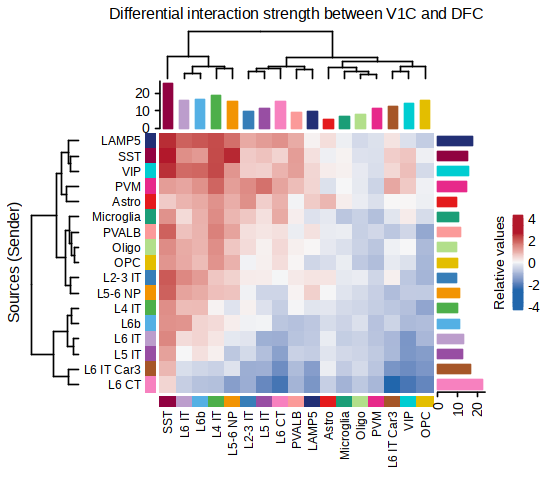

In [75]:
w <- 4.6
h <- 4
my.plot.size(w, h)
gg2[[1]]

In [123]:
pdf("project/multiomics/CellChat/tmpPlot/V1C-vs-DFC_diff_interaction_weight.pdf", w, h)
print(gg2[[1]])
dev.off()

png 
  2

# Check net

In [3]:
# net.weight <- gg2[[2]]

In [4]:
# head(net.weight)

# View role

In [908]:
ggL <- list()
for (i in names(chat.list)) {
    cc.obj <- chat.list[[i]]
    ggL[[i]] <- netAnalysis_signalingRole_scatter(
        cc.obj, slot.name="net", do.label=T, weight.MinMax=NULL,
        title=i
    )
}

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Signaling role analysis on the aggregated cell-ce

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


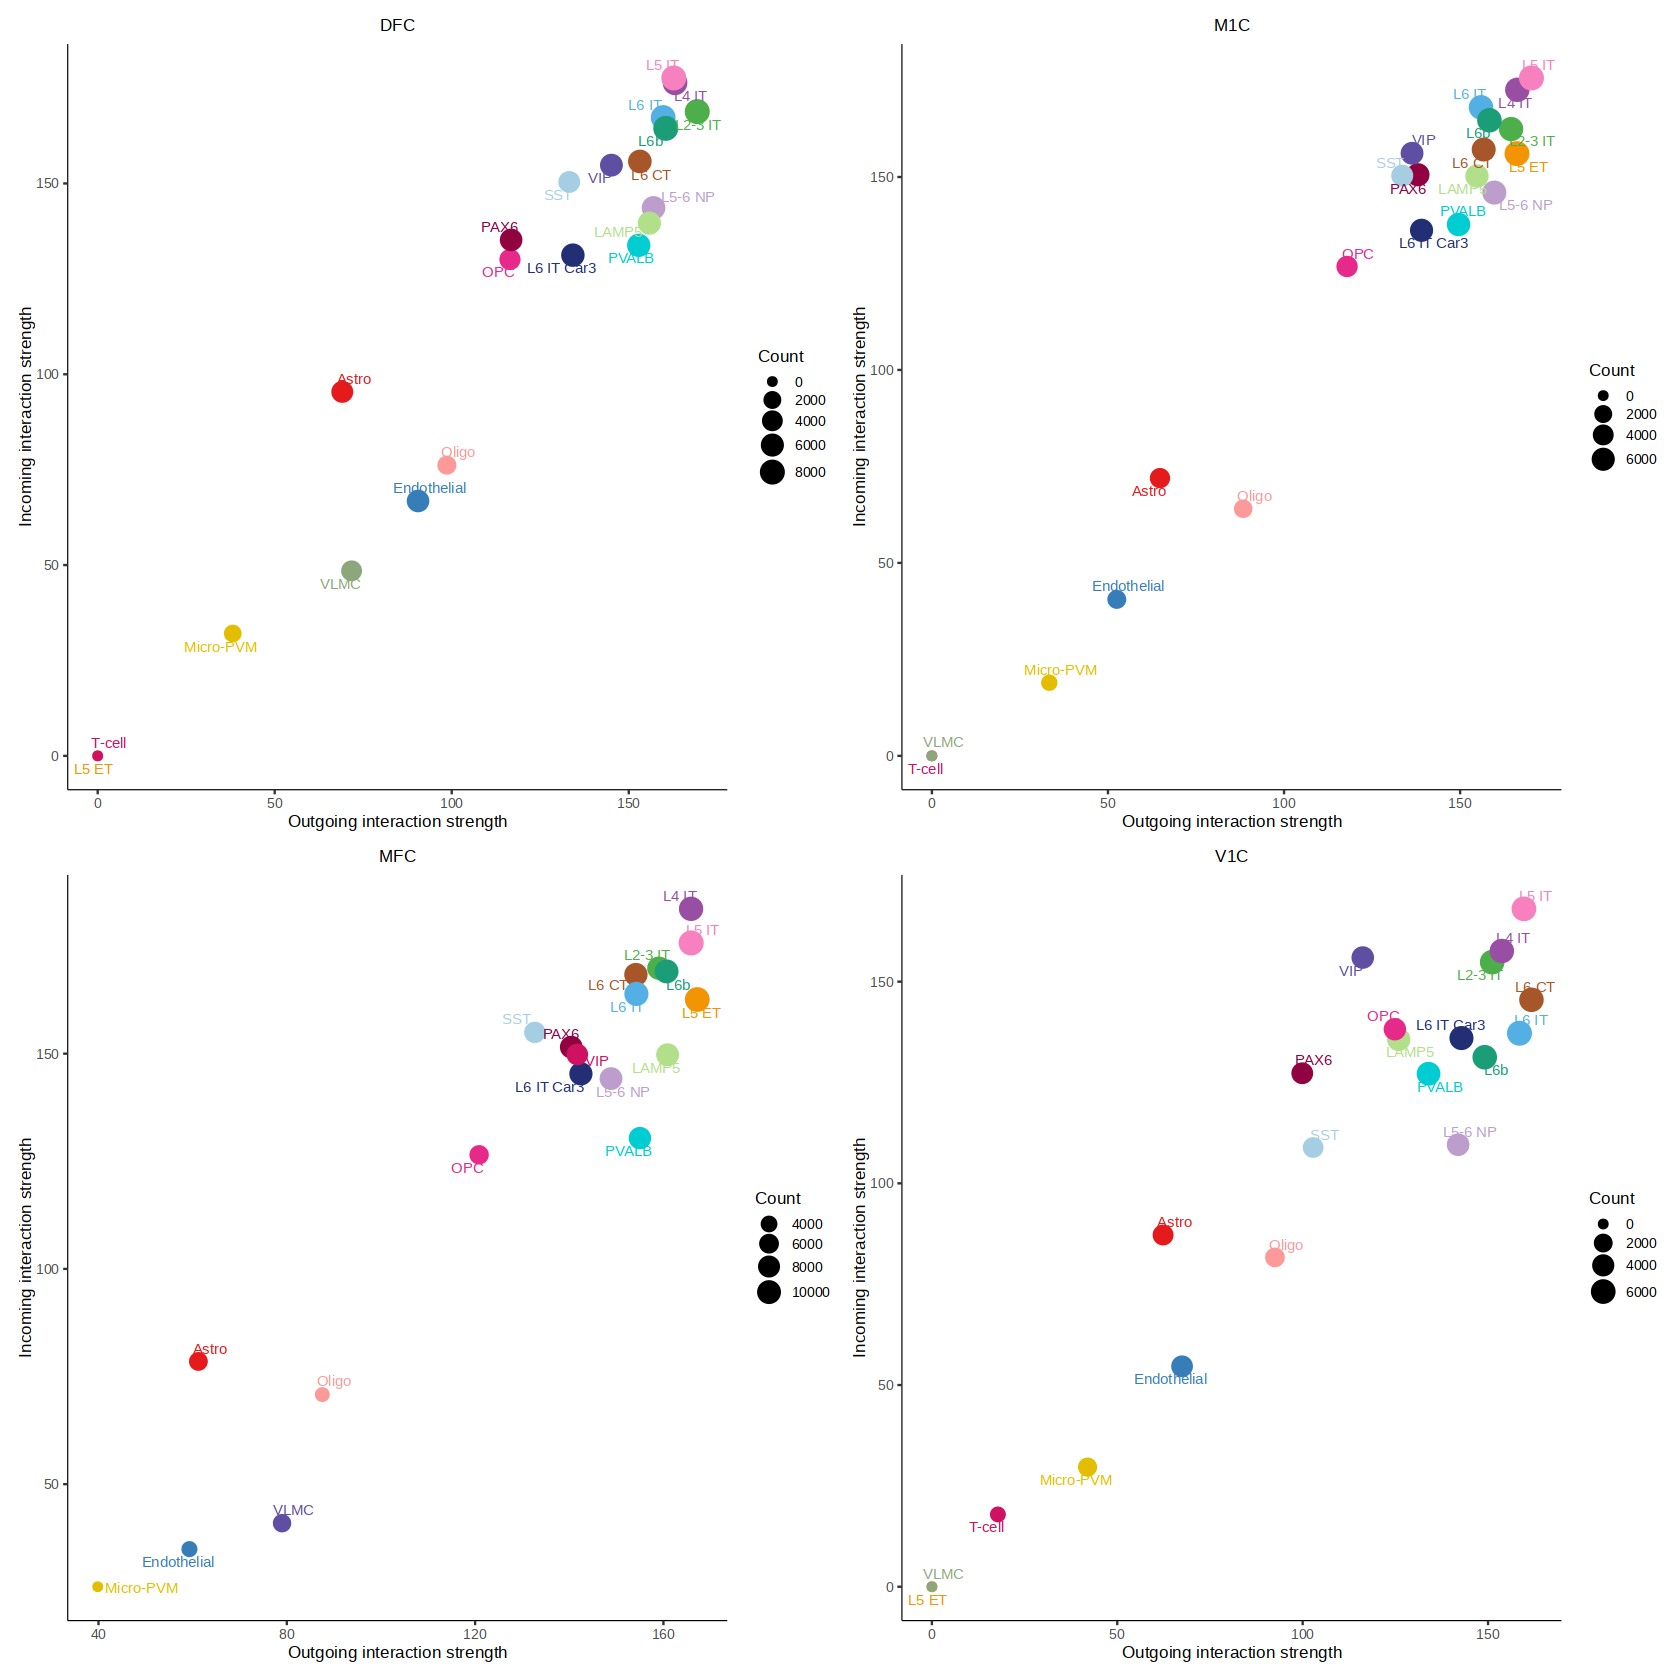

In [909]:
my.plot.size(14, 14)
ggL[[1]] + ggL[[2]] + ggL[[3]] + ggL[[4]]